In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
ss=pd.read_csv('Solar.csv')
ss.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [3]:
ss.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

As we could see that the class has a object variable we need to convert the value into numerical.

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss['class']=le.fit_transform(ss['class'])

We need to watch out for the null values in the data, if there then need to convert the null values
into some values by mean or the mode function.

In [5]:
ss.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

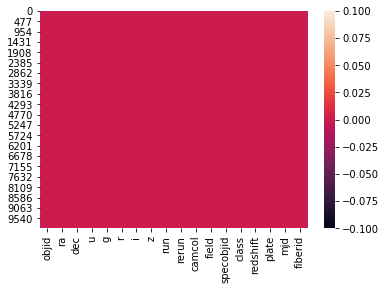

In [6]:
sns.heatmap(ss.isnull())

In [7]:
ss.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
ss.corr().head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


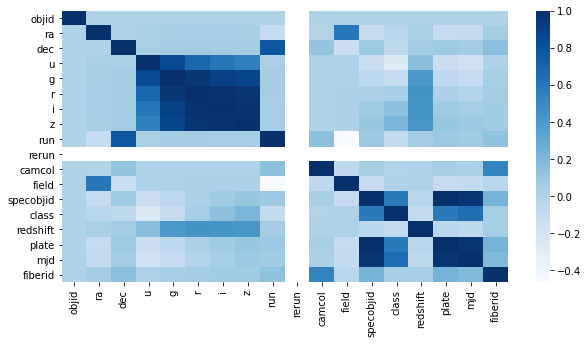

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(ss.corr(), cmap='Blues')

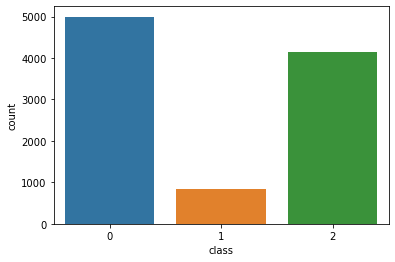

In [10]:
sns.countplot(x='class', data=ss)

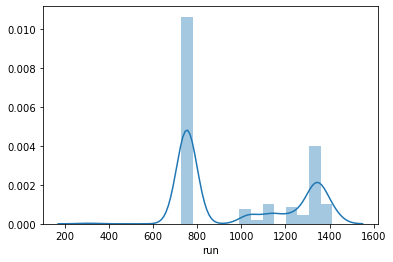

In [11]:
sns.distplot(ss['run'])

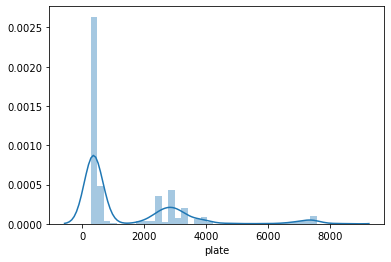

In [12]:
sns.distplot(ss['plate'])

In [13]:
sn=ss.drop('rerun', axis=1)

In [14]:
sn.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512


We need to check the data if the values are skewed or not, if they are skewed then in what aspect whether right skewed or left skewed, 
and then accordindly we need to convert the values as in normal distribution.So they are not baised towards left or right.

In [15]:
sn.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

(array([ 394.,   60.,   54.,    0.,  899., 1240., 3067., 2364.,  932.,
         990.]),
 array([  8.2351005 ,  33.50002863,  58.76495676,  84.02988489,
        109.29481302, 134.55974115, 159.82466928, 185.08959741,
        210.35452554, 235.61945367, 260.8843818 ]),
 <a list of 10 Patch objects>)

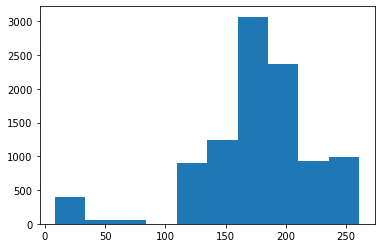

In [16]:
plt.hist(sn['ra'], bins=10)

(array([9.321e+03, 1.850e+02, 2.210e+02, 2.090e+02, 5.200e+01, 8.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.13607800e-03,  5.31662930e-01,  1.06746194e+00,  1.60326095e+00,
         2.13905995e+00,  2.67485896e+00,  3.21065797e+00,  3.74645698e+00,
         4.28225598e+00,  4.81805499e+00,  5.35385400e+00]),
 <a list of 10 Patch objects>)

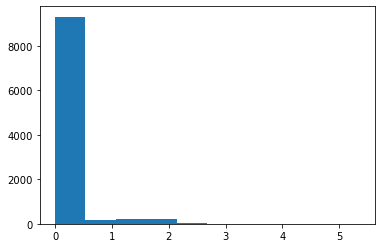

In [17]:
plt.hist(sn['redshift'], bins=10)

(array([6599.,    7.,  999., 1481.,  364.,   37.,   20.,   41.,  430.,
          22.]),
 array([ 266. , 1080.4, 1894.8, 2709.2, 3523.6, 4338. , 5152.4, 5966.8,
        6781.2, 7595.6, 8410. ]),
 <a list of 10 Patch objects>)

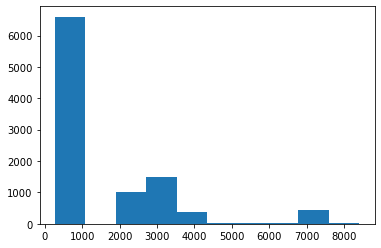

In [18]:
plt.hist(sn['plate'], bins=10)

In [19]:
so=sn.copy()

In [20]:
so.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

(array([ 394.,   60.,   54.,    0.,  899., 1240., 3067., 2364.,  932.,
         990.]),
 array([  8.2351005 ,  33.50002863,  58.76495676,  84.02988489,
        109.29481302, 134.55974115, 159.82466928, 185.08959741,
        210.35452554, 235.61945367, 260.8843818 ]),
 <a list of 10 Patch objects>)

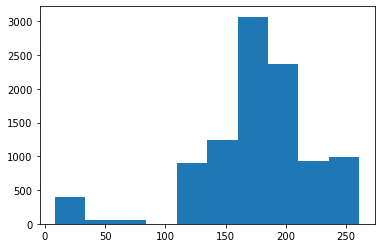

In [21]:
plt.hist(sn.ra, bins=10)

In [22]:
import warnings
warnings.filterwarnings('ignore')
so['plate']=np.log1p(so['plate'])
so['redshift']=np.log1p(so['redshift'])
so['objid']=np.log1p(so['objid'])
so['specobjid']=np.log1p(so['specobjid'])
so['mjd']=np.log1p(so['mjd'])

In [23]:
so['ra']=((so['ra'])/20)**10
so['u']=((so['u'])/20)**10

In [24]:
so['mjd']=np.sqrt(so['mjd'])
so['redshift']=np.log1p(so['redshift'])
so['ra']=np.sqrt(so['ra'])

In [25]:
so['ra']=((so['ra'])/20)**10

(array([9.766e+03, 2.500e+01, 3.500e+01, 6.700e+01, 3.800e+01, 2.500e+01,
        9.000e+00, 8.000e+00, 3.000e+00, 2.400e+01]),
 array([5.26799595e-33, 5.76241155e+41, 1.15248231e+42, 1.72872347e+42,
        2.30496462e+42, 2.88120578e+42, 3.45744693e+42, 4.03368809e+42,
        4.60992924e+42, 5.18617040e+42, 5.76241155e+42]),
 <a list of 10 Patch objects>)

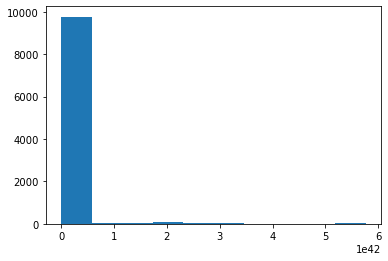

In [26]:
plt.hist(so.ra, bins=10)

In [27]:
so.skew()

objid        0.000000
ra           8.469933
dec          1.191544
u           -0.400611
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    0.696181
class        0.169292
redshift     3.142088
plate        0.696680
mjd          1.009821
fiberid      0.308053
dtype: float64

Now we need to remove the outliers as they deviate the results actual value, in many aspects.

{'whiskers': [<matplotlib.lines.Line2D at 0xddd6640>,
 'caps': [<matplotlib.lines.Line2D at 0xddd6d00>,
 'boxes': [<matplotlib.lines.Line2D at 0xddd62e0>],
 'medians': [<matplotlib.lines.Line2D at 0xdde1400>],
 'fliers': [<matplotlib.lines.Line2D at 0xdde1700>],
 'means': []}

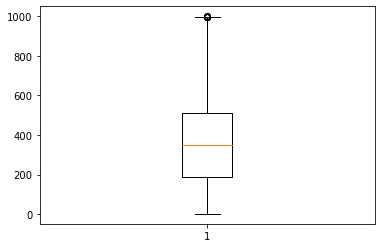

In [28]:
plt.boxplot(so.fiberid)

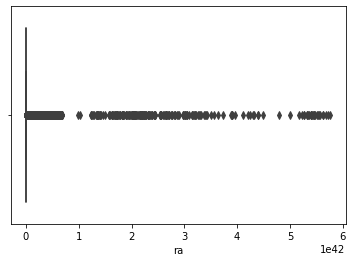

In [29]:
sns.boxplot(so.ra)

{'whiskers': [<matplotlib.lines.Line2D at 0xde8b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0xde8ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0xde8b070>],
 'medians': [<matplotlib.lines.Line2D at 0xde95190>],
 'fliers': [<matplotlib.lines.Line2D at 0xde95490>],
 'means': []}

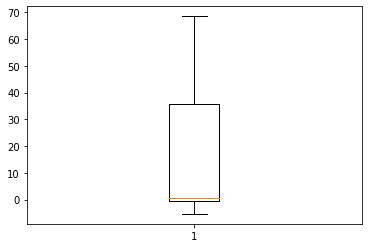

In [30]:
plt.boxplot(so.dec)

{'whiskers': [<matplotlib.lines.Line2D at 0xdee4370>,
 'caps': [<matplotlib.lines.Line2D at 0xdee4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0xded8fd0>],
 'medians': [<matplotlib.lines.Line2D at 0xdef2130>],
 'fliers': [<matplotlib.lines.Line2D at 0xdef2430>],
 'means': []}

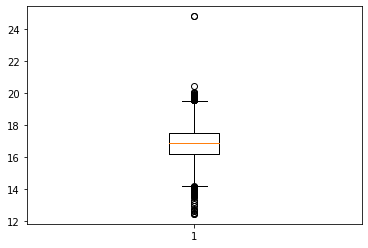

In [31]:
plt.boxplot(so.r)

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(so))
sa=so[(z<3)]
sa.head(10)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491
0,41.659746,1.329567e+35,0.089693,0.766064,17.0424,15.94699,15.50342,15.22531,752,4,267,42.76089,2,-0.000009,8.103797,3.303587,491


In [33]:
x=sa.drop('class', axis=1)
y=sa.iloc[:,12]

As most of coulmns are different and will consist of different units, 
so to bring every coulmn to some common unit we need to use Standard scaler function

In [34]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

Here we can clearly see in the data that is has many columns and much of a unnecessary data can give wrong predictions, 
which is also a curse of dimensionality.So to reduce that we need to use Principal Component Analysis 
and define the number of columns we desire by defining the n_compnents into it

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x=pca.fit_transform(x)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
max_scr=0
for r_state in range(42,101):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=r_state, test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 94 to the r2 Score is 0.8528843434819493


In [37]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=94, test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
print('accuracy score',acc_scr)
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score 0.8528843434819493
Confusion matrix [[61681   406  1865]
 [ 2340  7092   988]
 [11982  1148 39806]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     63952
           1       0.82      0.68      0.74     10420
           2       0.93      0.75      0.83     52936

    accuracy                           0.85    127308
   macro avg       0.85      0.80      0.82    127308
weighted avg       0.86      0.85      0.85    127308



In [38]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lg,x,y,scoring='accuracy', cv=5).mean()
cross_val_scr

0.8515977000659817

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [41]:
models=[]
models.append((knn,'KNeighborsClassifier'))
models.append((dtc,'DecisionTreeClassifier'))


In [42]:
for m, model_name in models:
    print('**********',model_name,'*****************')
    m.fit(x_train,y_train)
    pred_y=m.predict(x_test)
    acc=accuracy_score(y_test,pred_y)
    print('Accuracy Score', acc)
    print('\n')
    csc=cross_val_score(m,x,y,cv=10, scoring='accuracy').mean()
    print('Cross_val_score', csc)
    print('\n')
    print(classification_report(y_test,pred_y))
    print('\n')
    cms=confusion_matrix(y_test,pred_y)
    print('Confusion_matrix',cms)

********** KNeighborsClassifier *****************
Accuracy Score 0.9481336600999152


Cross_val_score 0.8201150754999569


              precision    recall  f1-score   support

           0       0.95      0.96      0.95     63952
           1       0.92      0.91      0.92     10420
           2       0.95      0.95      0.95     52936

    accuracy                           0.95    127308
   macro avg       0.94      0.94      0.94    127308
weighted avg       0.95      0.95      0.95    127308



Confusion_matrix [[61212   404  2336]
 [  590  9442   388]
 [ 2514   371 50051]]
********** DecisionTreeClassifier *****************
Accuracy Score 0.9925063625223867


Cross_val_score 0.8010745465037715


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     63952
           1       0.99      0.99      0.99     10420
           2       0.99      0.99      0.99     52936

    accuracy                           0.99    127308
   macro avg    

In [43]:
df1=pd.DataFrame(pred_y)
df1.to_csv('dtc_solar.csv')

In [51]:
import joblib
joblib.dump(dtc,'dtc_solar.pkl')

['dtc_solar.pkl']

So, as we can see the dtc algorithm gives us the best result as compare to other scores,
so that is the reason we selected dtc model loaded it with the help of joblib function